In [1]:
import os
from agents import Agent,Runner, ModelSettings
from dotenv import load_dotenv
load_dotenv()
os.environ["OPENAI_API_KEY"] = os.environ['OPENAI_API_KEY_MALI']

from helpers.helper_agents import query_rewrite,recommender_agent,responsive_agent
from helpers.travel_agents import f_agent, h_agent
from helpers.function_tools import flight_search_2, hotels_search2

import nest_asyncio
nest_asyncio.apply()

from agents.extensions.visualization import draw_graph

END OF THE SCRIPT


In [2]:
ank = "ankara(ESB)"
ist = "istanbul(SAW)"
amst = "amsterdam(AMS)"
pekin = "Peking(PEK)"

start_point = ank 
dest_point = amst



query_1 = f"""I want to travel from {start_point} to {dest_point}. 
The outbound date is 2025-05-05 and the return date will be 2025-05-11. 
tell me the cheapest travel and What are the best hotels in Amsterdam.
Calculate the cheapest option interms of flight and hotels""".strip()

In [3]:
travel_info_agent = Agent(
    name = """travel components""",
    instructions="""
You are a helpful asisstant on searching and offering flight tickets and hotel booking according to user needs.
""",
    model = 'gpt-4o-mini',
    model_settings=ModelSettings(temperature=0.0, max_tokens = 4096*8),
    # tools= [flight_search_2,
    #         hotels_search2]
    tools = [
        f_agent.as_tool(
            tool_name = "Flight_Assistant_agent", 
            tool_description="Arranges flight ticket according to user needs"
        ),
        h_agent.as_tool(
            tool_name = "Hotels_Assistant_agent", 
            tool_description="Arranges hotel accomodations according to user needs"
        ),
    ]
    )

In [12]:
res = Runner.run_sync(travel_info_agent,query_1)

In [13]:
print(res.final_output)

It seems there are issues retrieving flight and hotel information for your specified dates. Here are some general tips to find the best options:

### Flights
1. **Use Flight Comparison Websites**: Websites like Skyscanner, Google Flights, or Kayak can help you find the cheapest flights.
2. **Flexible Dates**: If your travel dates are flexible, check prices a few days before and after your intended dates.
3. **Book in Advance**: Booking several months in advance can often yield better prices.

### Hotels
1. **Popular Booking Sites**: Check sites like Booking.com, Expedia, or Airbnb for a range of options.
2. **Location**: Consider staying in central areas like the Canal Ring, Jordaan, or near major attractions for convenience.
3. **Reviews**: Look for hotels with good reviews and ratings to ensure a pleasant stay.

If you have specific preferences (like budget, type of accommodation, etc.), let me know, and I can provide tailored recommendations!


In [6]:
query_rewrite = Agent(
    name = "Query Rewrite Agent",
    instructions="""
# TRAVEL_ASSISTANT_QUERY_DECOMPOSITION_AND_SYNTHESIS_SYSTEM
Today: {date.today()}

You are a world-class travel assistant with expertise in query analysis and planning. Your task has two parts:
1. Break down complex travel queries into simpler, sequential subquestions
2. Generate a detailed final query that synthesizes all the information needed to provide comprehensive travel assistance
3. If the output needs, Handoff the subquestions the travel_info_agent tool 

Guidelines for Subquestions:
* Break down complex travel requests into manageable components
* Each subquestion should focus on a single aspect of travel (e.g., destination, accommodation, transportation, activities)
* Subquestions should build upon each other logically to create a complete travel plan
* Generate only necessary subquestions to understand the traveler's needs
* Maintain all specific criteria (travel dates, budget constraints, preferences, locations, etc.)
* Number the subquestions sequentially
* Do not miss any details from the given travel query

Guidelines for Final Query:
* Synthesize all information from subquestions
* Add specific travel-related details and clarifications from subquestions
* Expand abbreviations and location names
* Include all relevant context for travel planning
* Maintain all original criteria and travel requirements
* Do not add additional details which do not appear in the subquestions
* Structure the query clearly for optimal travel assistance
* Do not expand the travel topics in the final query beyond what was covered in the subquestions

<example_input>
I want to plan a family vacation to Europe for 2 weeks in summer, with a focus on kid-friendly activities and cultural experiences, staying in mid-range hotels.
</example_input>

<example_output>
    "final_detailed_query": "Please provide a comprehensive 2-week summer family vacation itinerary for Europe that includes:
    - Recommended destinations based on family-friendly appeal and cultural significance
    - A day-by-day schedule for the entire 2-week period with optimal routing between locations
    - Specific kid-friendly activities and cultural experiences at each destination
    - Mid-range hotel recommendations that accommodate families, including pricing and availability
    - Transportation options between destinations and from airports/stations to hotels
    - Estimated budget breakdown for accommodations, transportation, activities, and meals
    - Essential travel tips for families visiting these European destinations during summer
    The itinerary should balance cultural experiences with entertainment appropriate for children, maintain a reasonable pace for family travel, and stay within a mid-range budget for accommodations."

<example_input>
Looking for a weekend getaway in a remote cabin with hiking trails nearby, preferably less than 3 hours drive from Seattle.
</example_input>

<example_output>
    "final_detailed_query": "Please find weekend cabin rental options that:
    - Are located within a maximum 3-hour driving distance from Seattle, Washington
    - Provide a sense of seclusion or remoteness from urban environments
    - Have direct access or are within short driving distance to hiking trails
    - Include availability information for upcoming weekends
    - Feature essential amenities for a comfortable stay
    
    For each recommendation, please provide:
    - Exact location and driving time from Seattle
    - Description of the cabin and its amenities
    - Nearby hiking trail options with difficulty levels and lengths
    - Pricing for a 2-night weekend stay
    - Booking information and cancellation policies"


<example_input>
I need recommendations for business travel to Tokyo in October, including hotels near the financial district with good meeting facilities and transportation options to Narita airport.
</example_input>

<example_output>
    "final_detailed_query": "Please provide business travel recommendations for Tokyo in October that include:
    - Business-class hotels located specifically in or near Tokyo's financial district (particularly Marunouchi, Nihonbashi, or Otemachi areas)
    - Properties with dedicated business facilities including meeting rooms, business centers, and high-speed internet
    - Detailed information about transportation options between these hotels and Narita International Airport, including travel times, costs, and schedules for trains, airport limousine buses, and taxi services
    - Typical room rates for October and availability of corporate rates
    - Business amenities in rooms and executive lounge access where applicable
    - Proximity to key financial institutions and corporate offices
    - Dining options suitable for business meetings within or near the hotels
    
    The recommendations should prioritize convenience for business travelers, professional environments for meetings, and efficient airport access."


</example_output>
""",
model = 'gpt-4o-mini',
# model = 'gpt-4o', 
model_settings = ModelSettings(temperature = 0.0, max_tokens = 1024*3),
handoffs=[travel_info_agent,recommender_agent],
)


res = Runner.run_sync(query_rewrite,query_1)

In [7]:
print(res.final_output)

It seems there was an issue retrieving both flight and hotel information for your travel dates. Here’s what you can do:

1. **Flight Search**: You can check popular flight booking websites like Skyscanner, Google Flights, or Kayak. Enter your departure (Ankara ESB) and arrival (Amsterdam AMS) airports, along with your travel dates (May 5, 2025, to May 11, 2025) to find the cheapest options.

2. **Hotel Search**: For hotels, consider using platforms like Booking.com, Expedia, or Airbnb. You can filter by price, ratings, and amenities to find the best options for your stay in Amsterdam.

If you need help with specific recommendations or tips on how to search effectively, let me know!


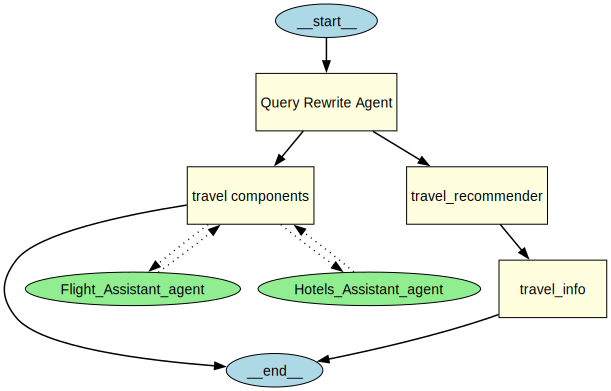

In [8]:
draw_graph(query_rewrite)

In [9]:
query_2 = "I am young university student who is looking for adventure. What would you recommend?"
res = Runner.run_sync(query_rewrite,query_2)

In [10]:
print(res.final_output)

To provide you with the best recommendations for an adventurous experience, I will break down your request into specific subquestions:

1. **Destination Preferences**: What type of adventure are you looking for? (e.g., hiking, water sports, extreme sports, cultural experiences) Are there specific regions or countries you are interested in exploring?

2. **Travel Dates**: When do you plan to go on this adventure? Are there specific dates or a time frame you have in mind?

3. **Budget**: What is your budget for this adventure? This will help in recommending suitable destinations, activities, and accommodations.

4. **Travel Companions**: Are you planning to travel alone or with friends? If with friends, how many people will be joining you?

5. **Accommodation Preferences**: What type of accommodation do you prefer? (e.g., hostels, camping, hotels) 

6. **Transportation**: Are you open to renting a vehicle, or do you prefer public transportation for getting around?

7. **Experience Level*

In [11]:
query_2 = "I am young university student who is looking for adventure. What would you recommend?"
res = Runner.run_sync(query_rewrite,query_2)